## **Importing the Necessary Libraries and Display Orignal Images**

Dataset extracted to: /content/dataset
Found 8 images.


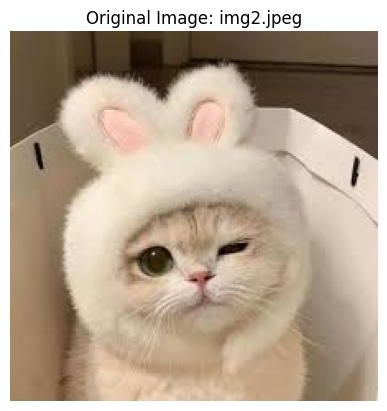

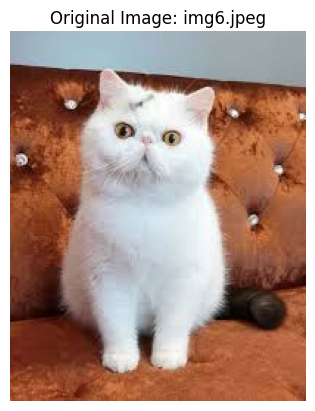

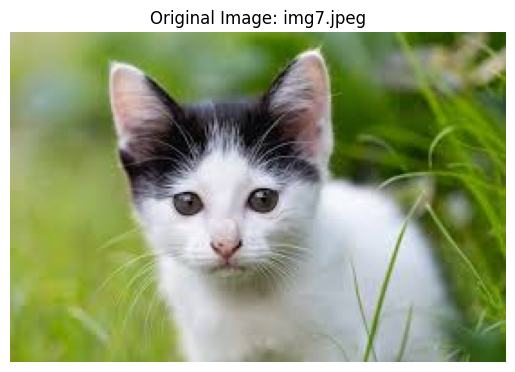

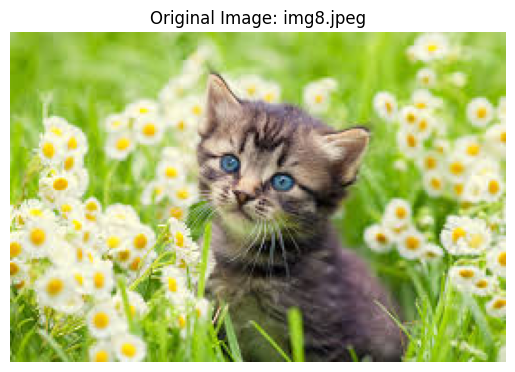

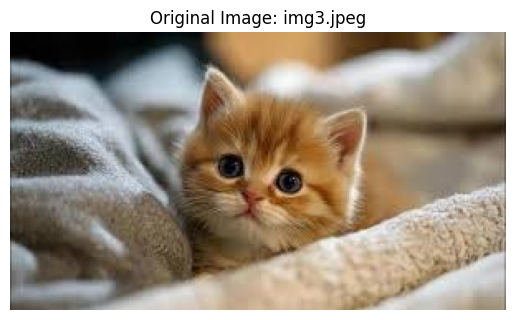

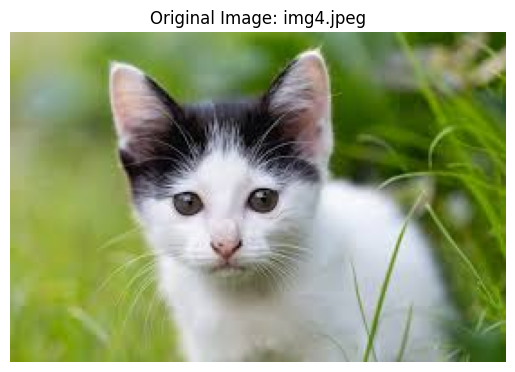

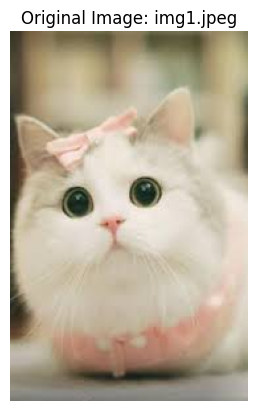

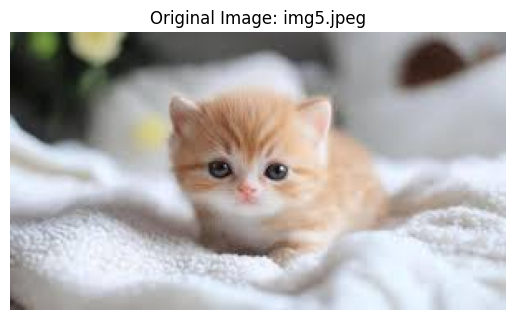

In [5]:
import zipfile
import os
import cv2
import matplotlib.pyplot as plt

# Step 1: Unzip the dataset
zip_path = "/content/dataset.zip"
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted to:", extract_path)

# Step 2: Recursively get all image files
image_files = []
for root, dirs, files in os.walk(extract_path):
    for f in files:
        if f.lower().endswith(('.jpg', '.jpeg', '.png')):  # lowercase check
            image_files.append(os.path.join(root, f))
print(f"Found {len(image_files)} images.")

# Step 3: Loop through and display each image
for img_path in image_files:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f"Original Image: {os.path.basename(img_path)}")
    plt.axis('off')
    plt.show()


**Converting the Original Image to Grayscale and Displaying It**

Found 8 images.


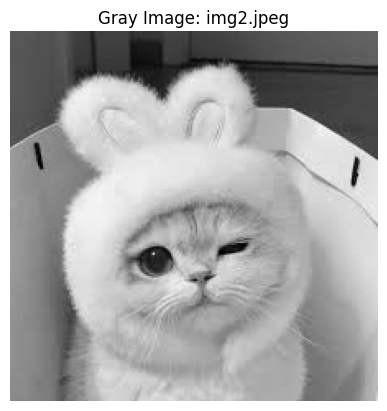

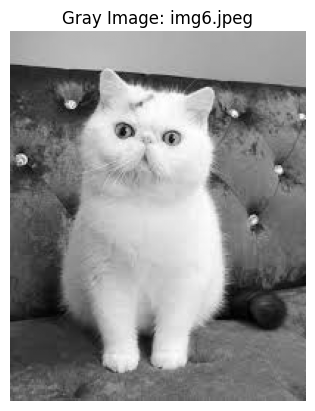

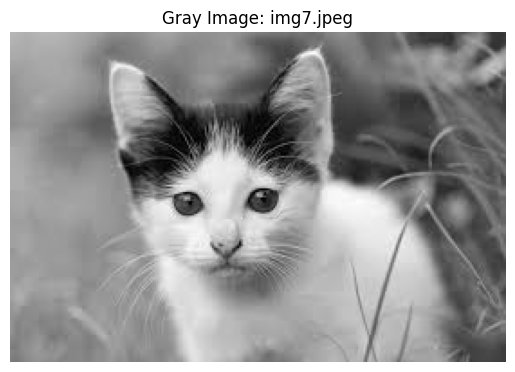

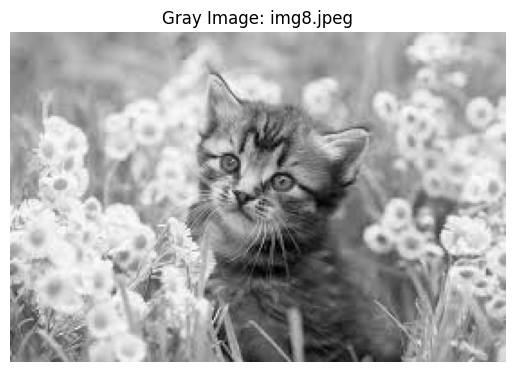

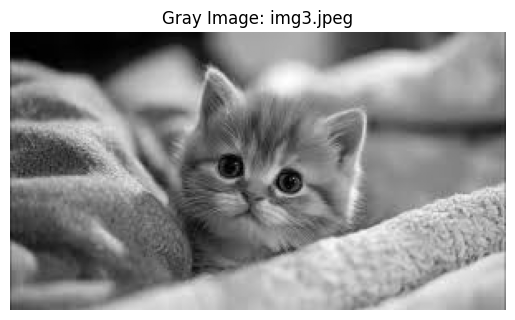

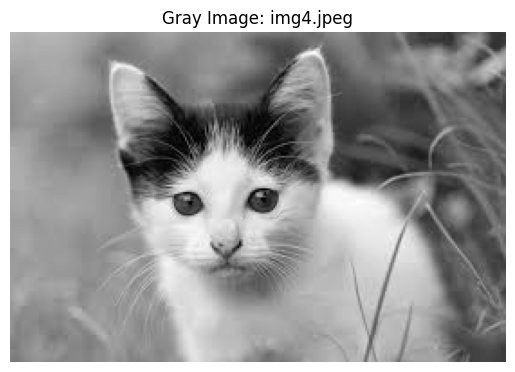

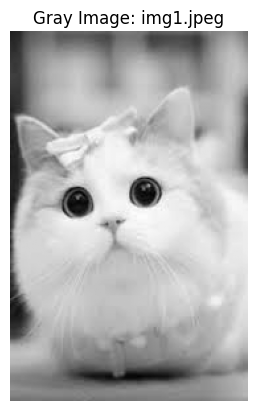

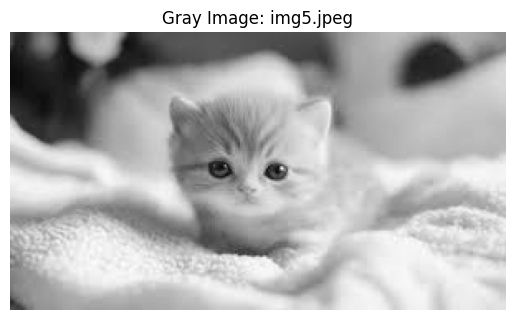

In [6]:
image_files = []
for root, dirs, files in os.walk(extract_path):
    for f in files:
        if f.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_files.append(os.path.join(root, f))

print(f"Found {len(image_files)} images.")

# Step 3: Loop through and display each image in grayscale
for img_path in image_files:
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # convert to grayscale

    plt.imshow(gray, cmap='gray')
    plt.title(f"Gray Image: {os.path.basename(img_path)}")
    plt.axis('off')
    plt.show()

**Applying Gaussian Blur to Grayscale Image for a Softened Effect**

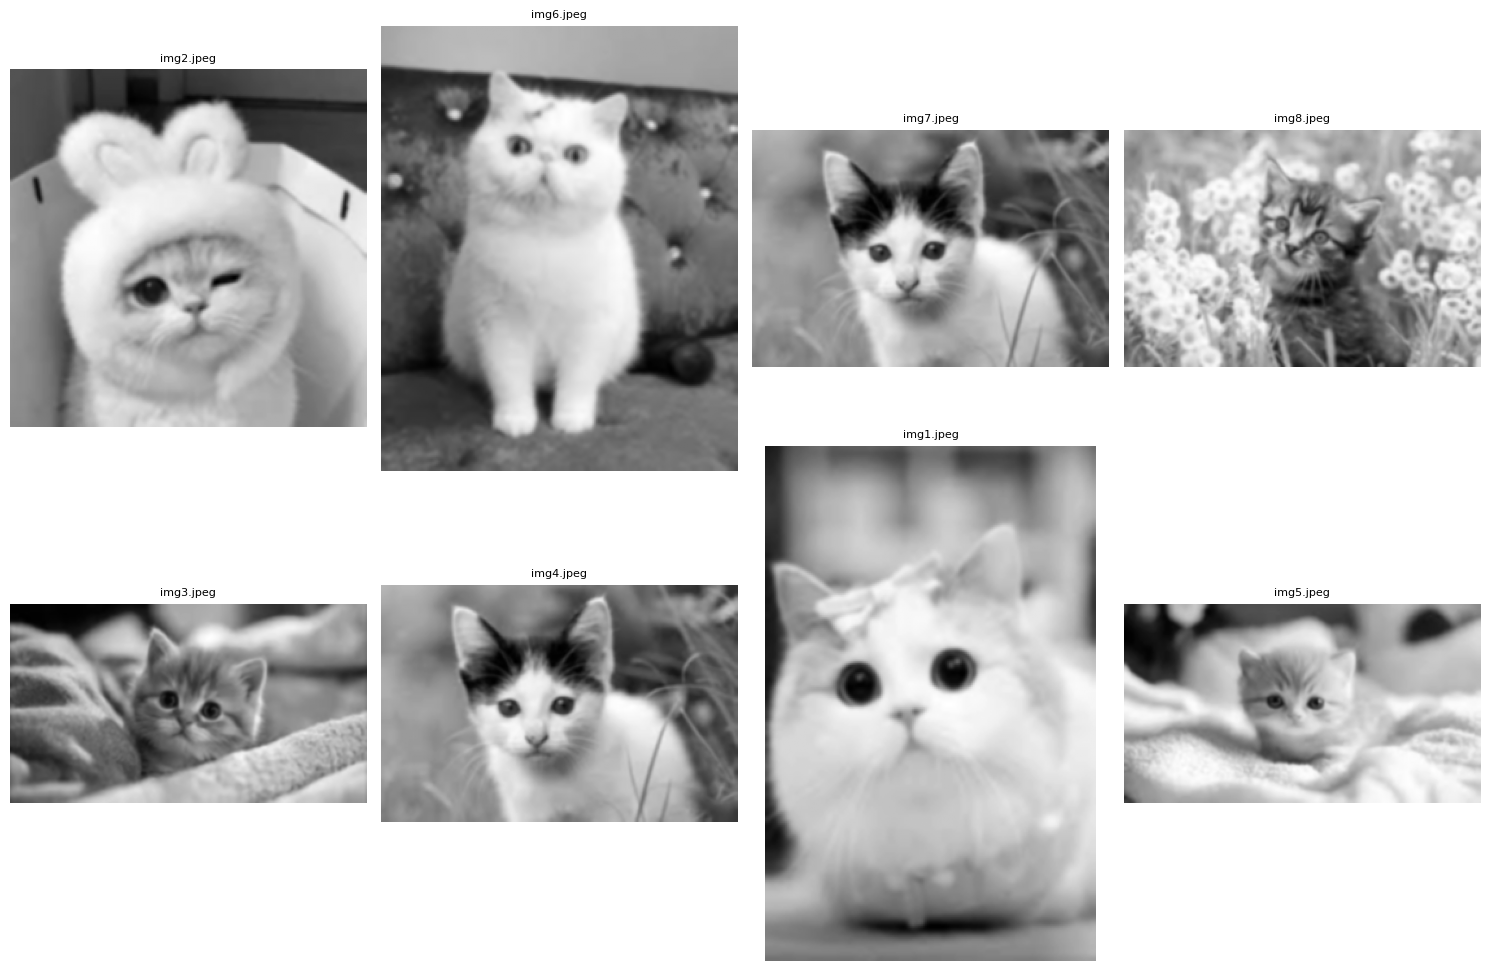

In [7]:
plt.figure(figsize=(15, 10))  # adjust figure size
for i, img_path in enumerate(image_files):
    img = cv2.imread(img_path)
# Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 # Apply Gaussian blur
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
 # Plot in a grid
    plt.subplot(2, 4, i+1)  # change 2,4 if more images
    plt.imshow(blur, cmap='gray')
    plt.title(f"{os.path.basename(img_path)}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()


**Detecting Edges in the Blurred Image using Canny Edge Detection**

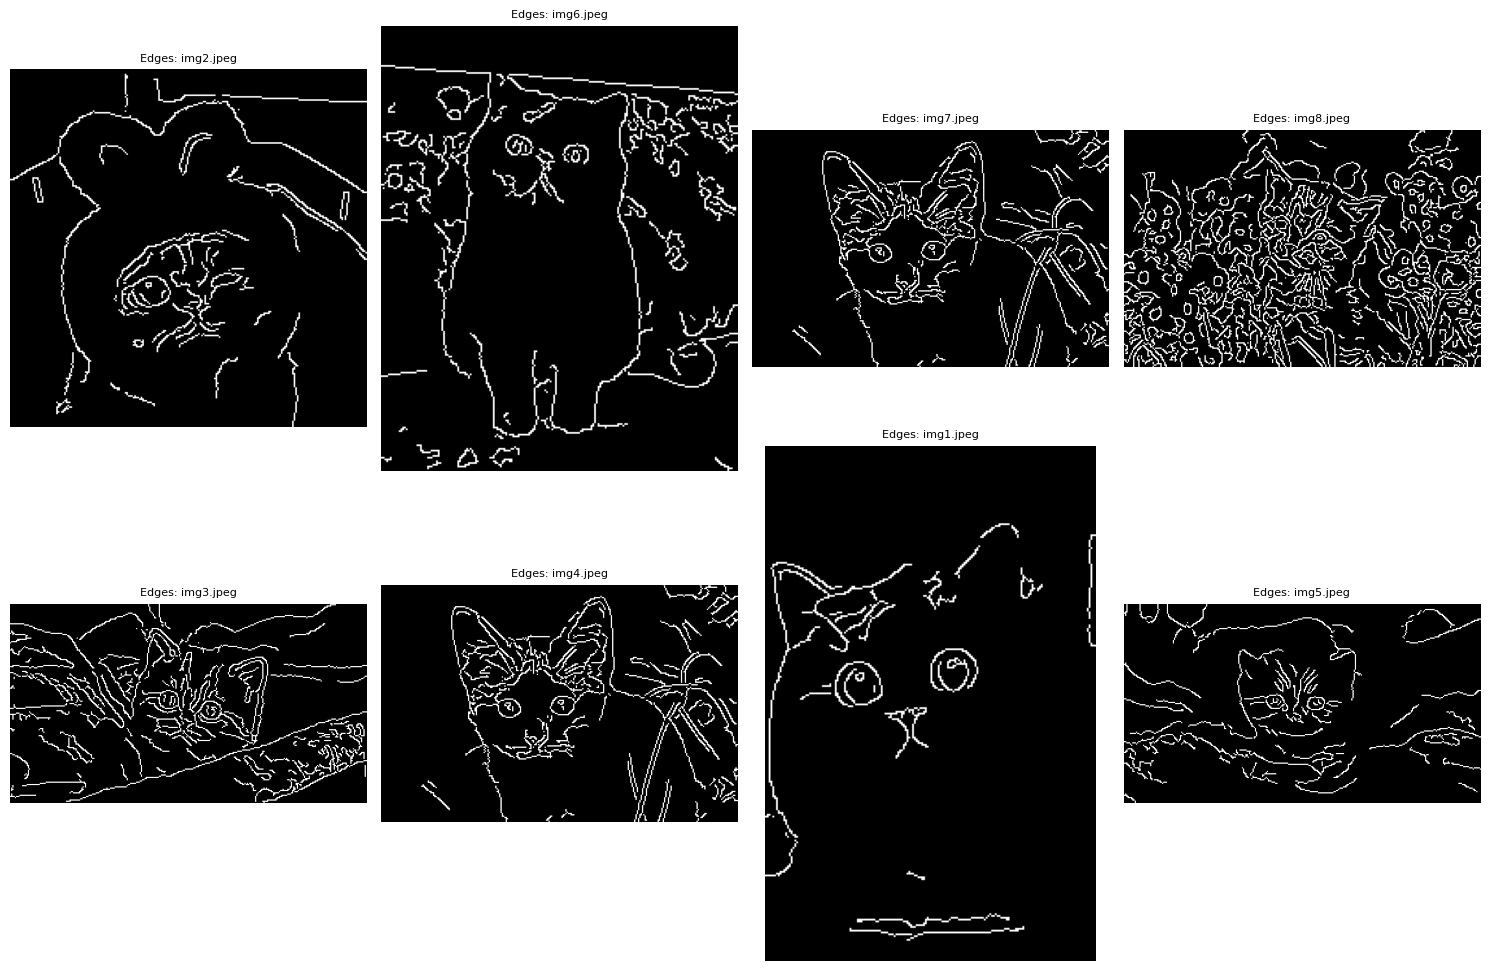

In [8]:
num_images = len(image_files)
cols = 4  # number of columns in grid
rows = (num_images + cols - 1) // cols  # compute rows needed
plt.figure(figsize=(15, 5 * rows))  # adjust figure size
for i, img_path in enumerate(image_files):
    img = cv2.imread(img_path)

 # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blur, 60, 100)

    # Plot in grid
    plt.subplot(rows, cols, i+1)
    plt.imshow(edges, cmap='gray')
    plt.title(f"Edges: {os.path.basename(img_path)}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

**Creating a Pencil Sketch Effect by Inverting Edges in the Image**

Found 8 images.
Sketch weight for img2.jpeg: 48190
Sketch weight for img6.jpeg: 47542
Sketch weight for img7.jpeg: 46740
Sketch weight for img8.jpeg: 42206
Sketch weight for img3.jpeg: 45732
Sketch weight for img4.jpeg: 46740
Sketch weight for img1.jpeg: 48984
Sketch weight for img5.jpeg: 47593


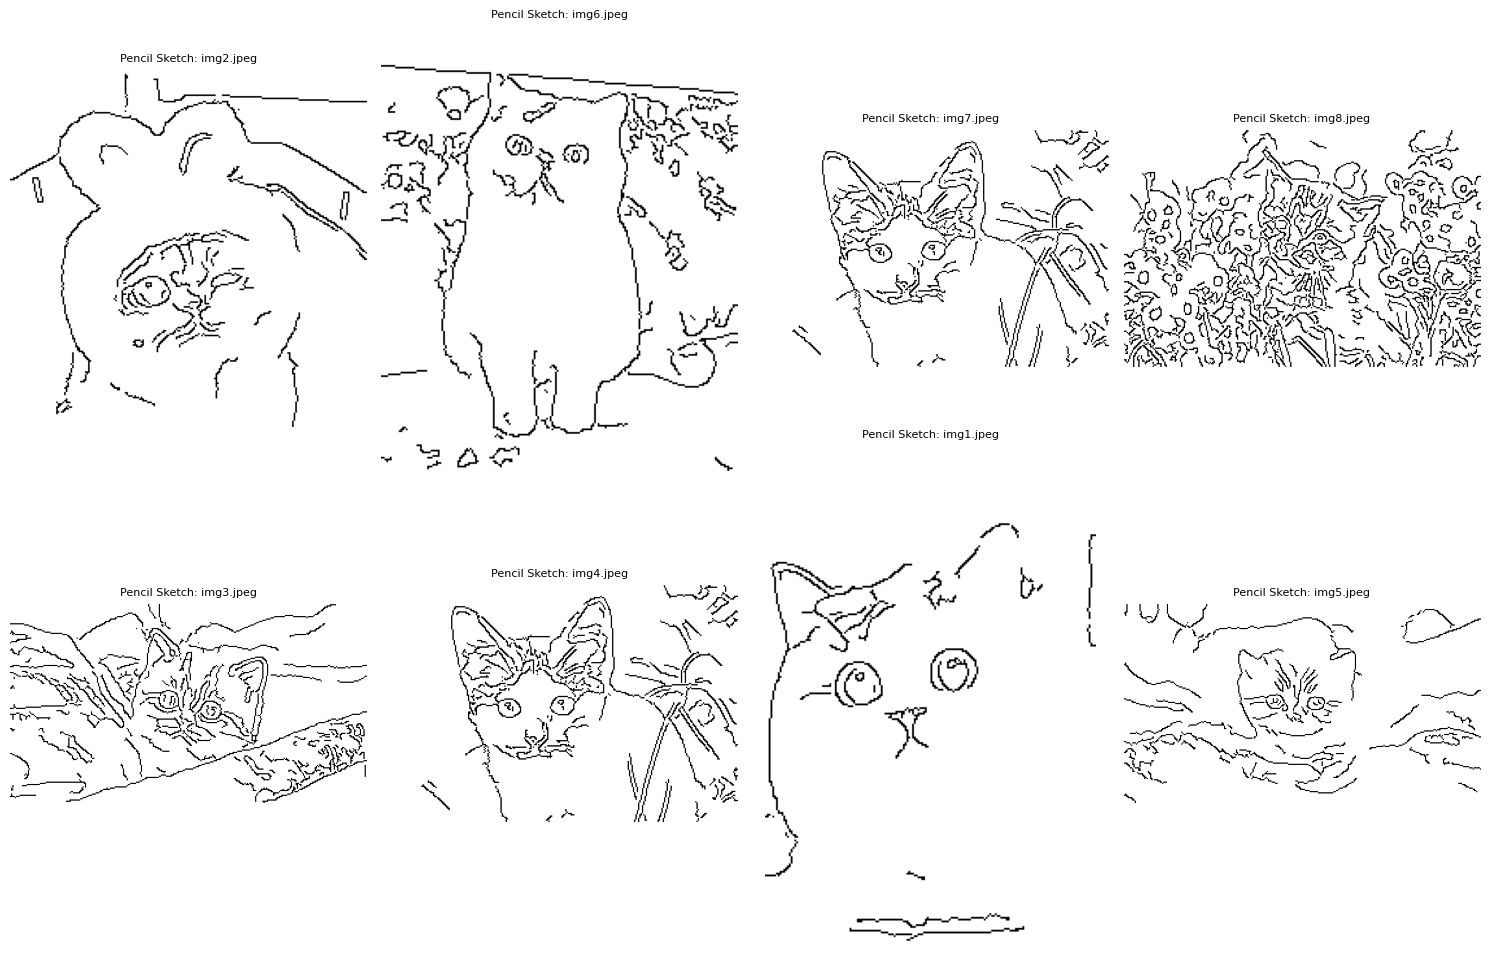

In [9]:
image_files = []
for root, dirs, files in os.walk(extract_path):
    for f in files:
        if f.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_files.append(os.path.join(root, f))

print(f"Found {len(image_files)} images.")

# Step 3: Apply Pencil Sketch effect to all images and display
num_images = len(image_files)
cols = 4  # number of columns in grid
rows = (num_images + cols - 1) // cols  # compute number of rows

plt.figure(figsize=(15, 5 * rows))

for i, img_path in enumerate(image_files):
    img = cv2.imread(img_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    edges = cv2.Canny(blur, 60, 100)

    # Invert edges for pencil sketch effect
    sketch = cv2.bitwise_not(edges)

    # Compute weight (non-zero pixels)
    weight = cv2.countNonZero(sketch)
    print(f"Sketch weight for {os.path.basename(img_path)}: {weight}")

    # Display sketch
    plt.subplot(rows, cols, i+1)
    plt.imshow(sketch, cmap='gray')
    plt.title(f"Pencil Sketch: {os.path.basename(img_path)}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()
